In [1]:
import geopandas as gpd
import contextily as cx
import pandas as pd
%matplotlib inline
from shapely.geometry import Polygon, LineString, Point
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns
from scipy import stats
import scipy as sp
import xarray as xr
from sklearn.linear_model import LinearRegression

In [19]:
datapath = '/Users/zhu/Dropbox/Code/Publications/ZEV-adoption-analysis-data/'
#datapath = '{path to ZEV-adoption-analysis-data folder}'

In [20]:
#datapath = '/Users/zhu/Dropbox/Database/Hera/'
vehicle_emis_filename = 'LA_Emis_vehicle_emissions_GRA2PES_CO2.csv'
vehicle_emis = pd.read_csv(datapath + vehicle_emis_filename)

cols = ['Month06 (mt/day)','Month07 (mt/day)','Month08 (mt/day)']
voc_comb = pd.DataFrame()

voc = pd.DataFrame(columns=cols+['species'])
voc.loc['full',cols] = (vehicle_emis.loc[6,cols]*5+vehicle_emis.loc[7,cols]+vehicle_emis.loc[8,cols])/7
voc.loc['full-onroad-gasoline',cols] = (vehicle_emis.loc[24,cols]*5+vehicle_emis.loc[25,cols]+vehicle_emis.loc[26,cols])/7
voc.loc['full-onroad-gasoline-diesel',cols] = (vehicle_emis.loc[33,cols]*5+vehicle_emis.loc[34,cols]+vehicle_emis.loc[35,cols])/7
voc.loc['full-onroad-gasoline-diesel-offroad-gasoline',cols] = (vehicle_emis.loc[42,cols]*5+vehicle_emis.loc[43,cols]+vehicle_emis.loc[44,cols])/7
voc.loc['full-onroad-offroad',cols] = (vehicle_emis.loc[51,cols]*5+vehicle_emis.loc[52,cols]+vehicle_emis.loc[53,cols])/7
voc.loc[:,'species'] = 'VOC'
voc_sec = pd.DataFrame()
col = 'Month08 (mt/day)'
voc_sec.loc[0,'Other anthro. emission'] = voc.loc['full-onroad-offroad',col]
voc_sec.loc[0,'Offroad diesel'] = voc.loc['full-onroad-gasoline-diesel-offroad-gasoline',col] - voc.loc['full-onroad-offroad',col]
voc_sec.loc[0,'Offroad gasoline'] = voc.loc['full-onroad-gasoline-diesel',col] - voc.loc['full-onroad-gasoline-diesel-offroad-gasoline',col]
voc_sec.loc[0,'Onroad diesel'] = voc.loc['full-onroad-gasoline',col] - voc.loc['full-onroad-gasoline-diesel',col] 
voc_sec.loc[0,'Onroad gasoline'] = voc.loc['full',col] - voc.loc['full-onroad-gasoline',col] 

voc_comb = pd.concat([voc_comb, voc_sec])

voc = pd.DataFrame(columns=cols+['species'])
voc.loc['full',cols] = (vehicle_emis.loc[3,cols]*5+vehicle_emis.loc[4,cols]+vehicle_emis.loc[5,cols])/7
voc.loc['full-onroad-gasoline'] = (vehicle_emis.loc[21,cols]*5+vehicle_emis.loc[22,cols]+vehicle_emis.loc[23,cols])/7
voc.loc['full-onroad-gasoline-diesel',cols] = (vehicle_emis.loc[30,cols]*5+vehicle_emis.loc[31,cols]+vehicle_emis.loc[32,cols])/7
voc.loc['full-onroad-gasoline-diesel-offroad-gasoline',cols] = (vehicle_emis.loc[39,cols]*5+vehicle_emis.loc[40,cols]+vehicle_emis.loc[41,cols])/7
voc.loc['full-onroad-offroad',cols] = (vehicle_emis.loc[48,cols]*5+vehicle_emis.loc[49,cols]+vehicle_emis.loc[50,cols])/7
voc.loc[:,'species'] = 'NOx'
voc_sec = pd.DataFrame()
col = 'Month08 (mt/day)'
voc_sec.loc[1,'Other anthro. emission'] = voc.loc['full-onroad-offroad',col]
voc_sec.loc[1,'Offroad diesel'] = voc.loc['full-onroad-gasoline-diesel-offroad-gasoline',col] - voc.loc['full-onroad-offroad',col]
voc_sec.loc[1,'Offroad gasoline'] = voc.loc['full-onroad-gasoline-diesel',col] - voc.loc['full-onroad-gasoline-diesel-offroad-gasoline',col]
voc_sec.loc[1,'Onroad diesel'] = voc.loc['full-onroad-gasoline',col] - voc.loc['full-onroad-gasoline-diesel',col] 
voc_sec.loc[1,'Onroad gasoline'] = voc.loc['full',col] - voc.loc['full-onroad-gasoline',col] 

voc_comb = pd.concat([voc_comb, voc_sec])


voc = pd.DataFrame(columns=cols+['species'])
voc.loc['full',cols] = (vehicle_emis.loc[0,cols]*5+vehicle_emis.loc[1,cols]+vehicle_emis.loc[2,cols])/7
voc.loc['full-onroad-gasoline',cols] = (vehicle_emis.loc[18,cols]*5+vehicle_emis.loc[19,cols]+vehicle_emis.loc[20,cols])/7
voc.loc['full-onroad-gasoline-diesel',cols] = (vehicle_emis.loc[27,cols]*5+vehicle_emis.loc[28,cols]+vehicle_emis.loc[29,cols])/7
voc.loc['full-onroad-gasoline-diesel-offroad-gasoline',cols] = (vehicle_emis.loc[36,cols]*5+vehicle_emis.loc[37,cols]+vehicle_emis.loc[38,cols])/7
voc.loc['full-onroad-offroad',cols] = (vehicle_emis.loc[45,cols]*5+vehicle_emis.loc[46,cols]+vehicle_emis.loc[47,cols])/7
voc.loc[:,'species'] = 'CO2'
voc_sec = pd.DataFrame()
cols = 'Month08 (mt/day)'
voc_sec.loc[2,'Other anthro. emission'] = voc.loc['full-onroad-offroad',col]
voc_sec.loc[2,'Offroad diesel'] = voc.loc['full-onroad-gasoline-diesel-offroad-gasoline',col] - voc.loc['full-onroad-offroad',col]
voc_sec.loc[2,'Offroad gasoline'] = voc.loc['full-onroad-gasoline-diesel',col] - voc.loc['full-onroad-gasoline-diesel-offroad-gasoline',col]
voc_sec.loc[2,'Onroad diesel'] = voc.loc['full-onroad-gasoline',col] - voc.loc['full-onroad-gasoline-diesel',col] 
voc_sec.loc[2,'Onroad gasoline'] = voc.loc['full',col] - voc.loc['full-onroad-gasoline',col] 

voc_comb = pd.concat([voc_comb, voc_sec])


In [21]:
voc_comb_sum = voc_comb.sum(axis=1)
voc_comb.loc[0,:] = voc_comb.loc[0,:]/voc_comb_sum.loc[0]*100
voc_comb.loc[1,:] = voc_comb.loc[1,:]/voc_comb_sum.loc[1]*100
voc_comb.loc[2,:] = voc_comb.loc[2,:]/voc_comb_sum.loc[2]*100

In [33]:
voc_comb.loc[2,:]/voc_comb.sum(axis=1)[2]

Other anthro. emission    0.474277
Offroad diesel            0.010869
Offroad gasoline          0.015728
Onroad diesel             0.087278
Onroad gasoline           0.411849
Name: 2, dtype: float64

In [39]:
(0.087278+0.015728+0.010869)

0.11387499999999999

Text(0, 0.5, 'Contribution (%)')

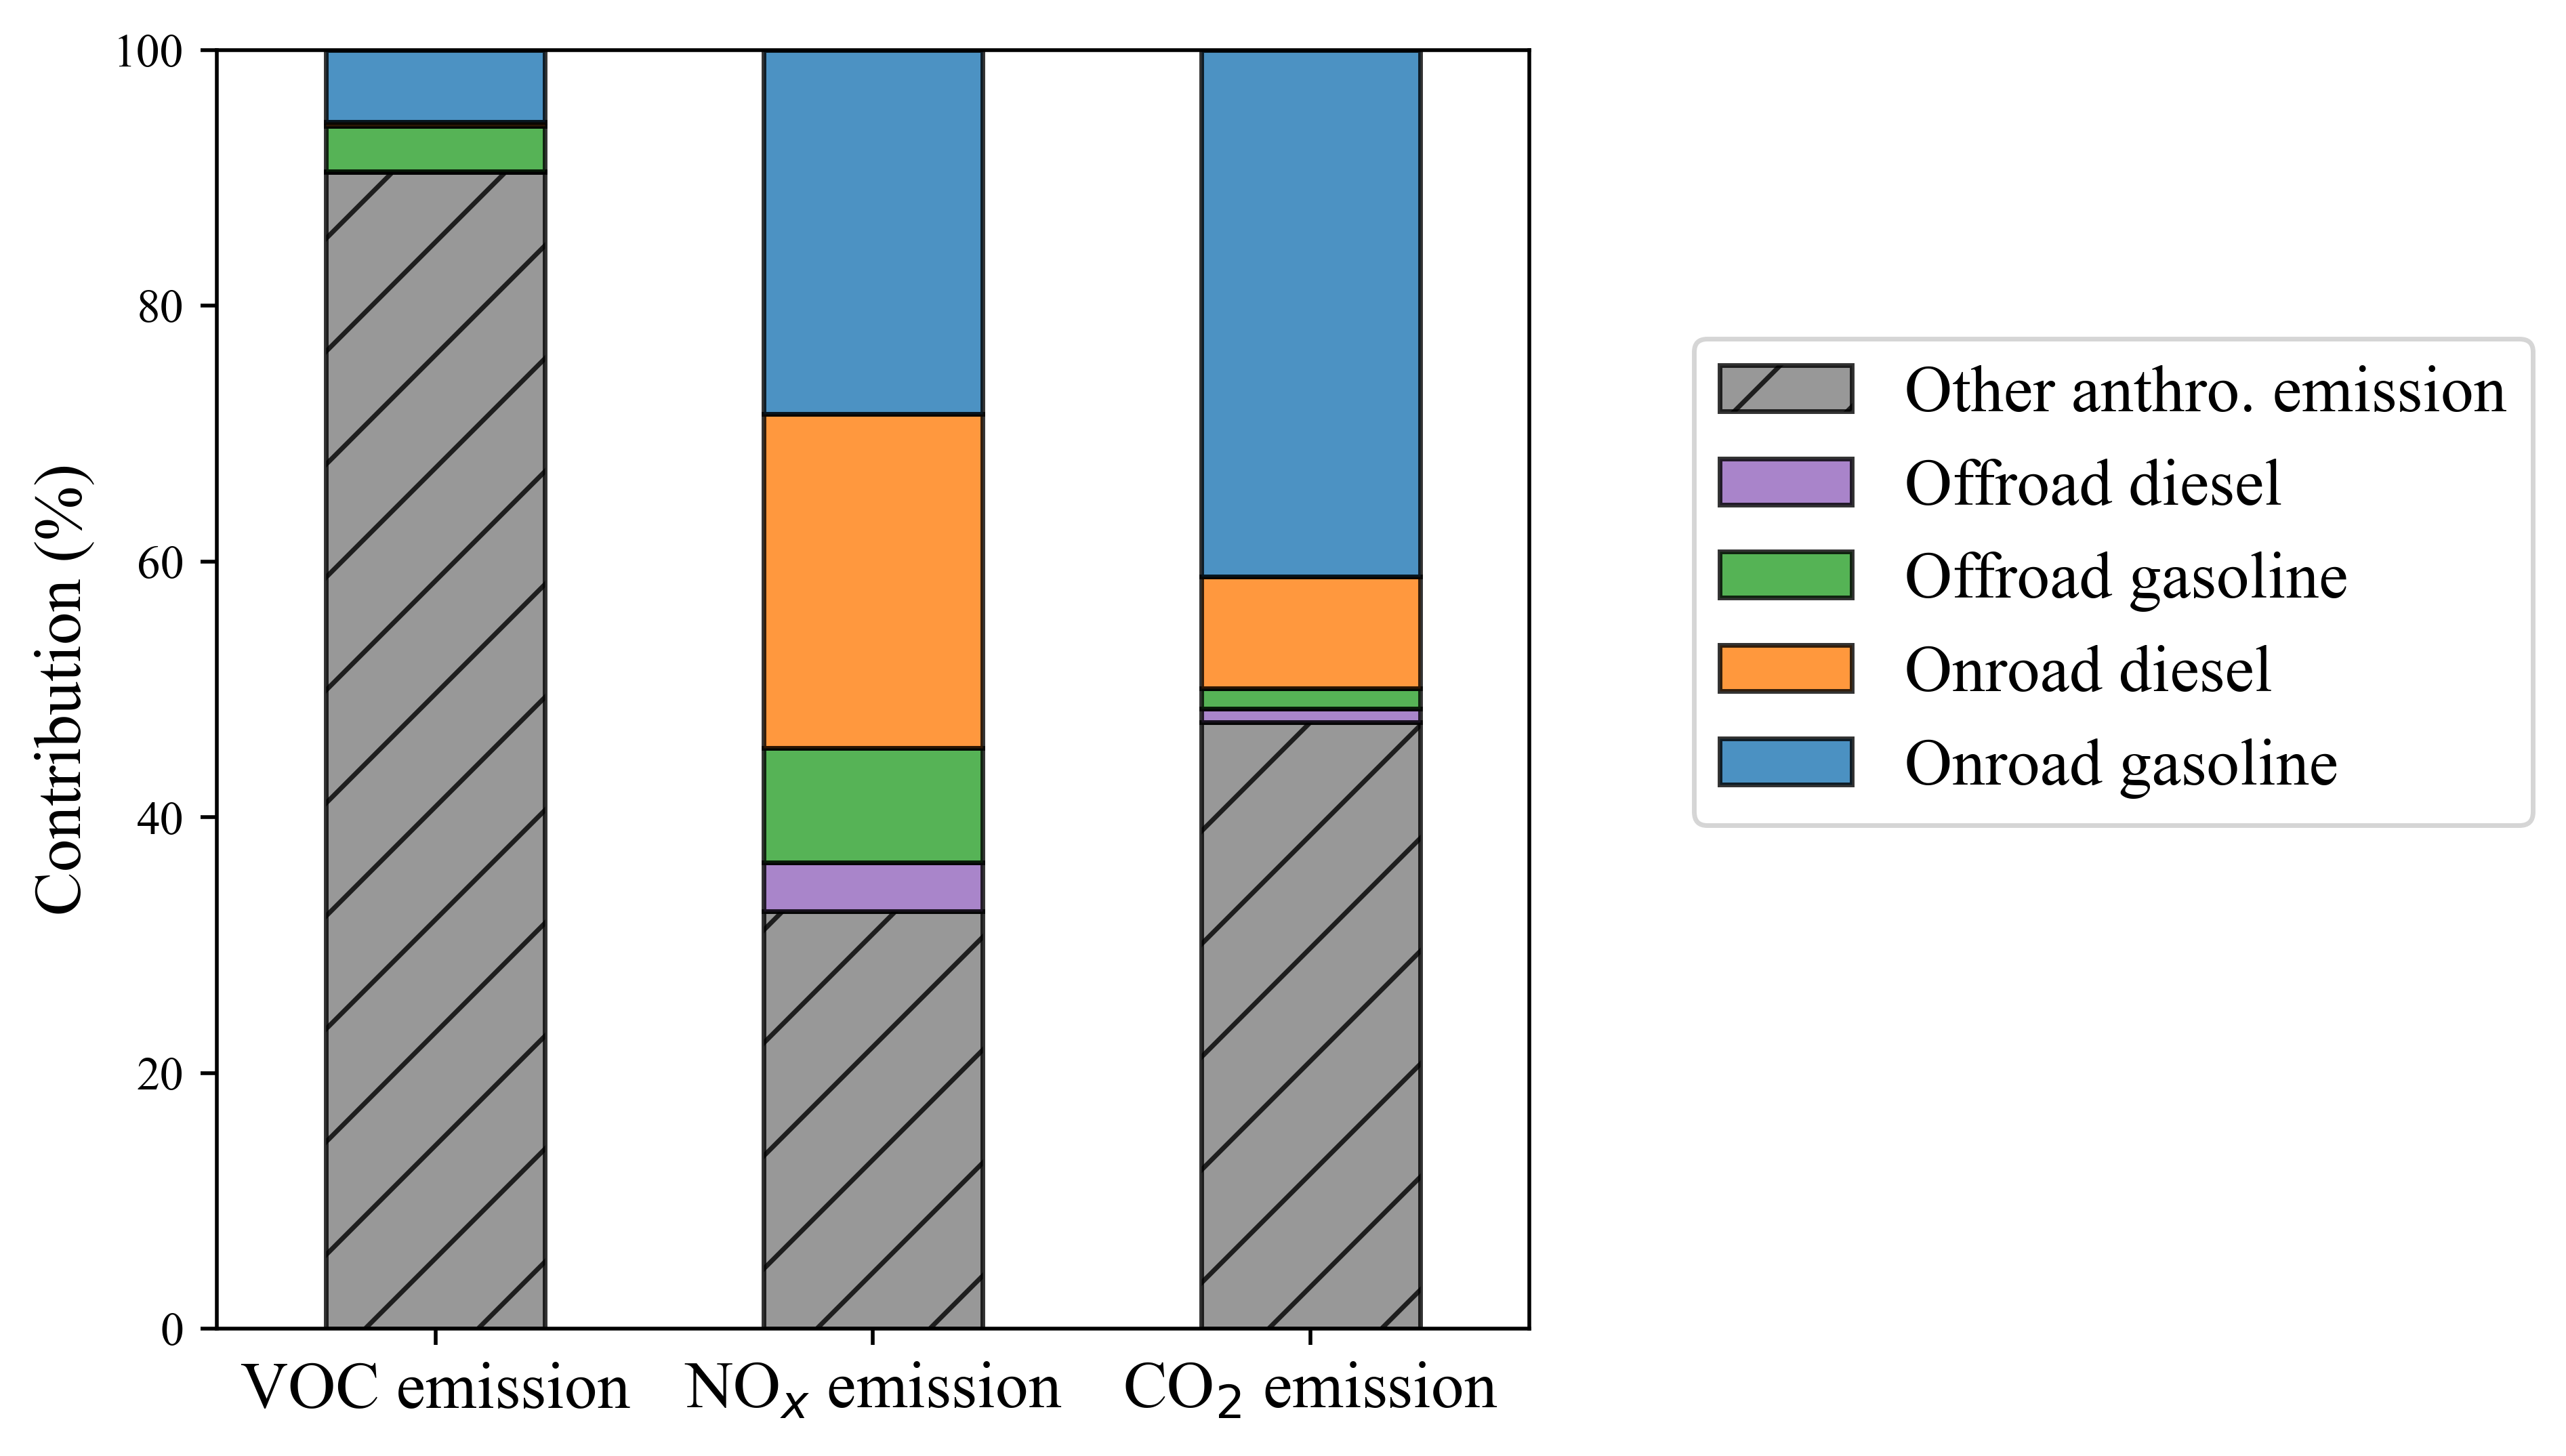

In [31]:
labels = voc_comb.columns
fig, axs = plt.subplots(1,1,figsize=(5,5),dpi=500)

plt.rcParams["font.family"] = "Times New Roman"
boxcolors = ['tab:gray','tab:purple','tab:green','tab:orange','tab:blue']
bars = voc_comb.plot(kind='bar', stacked=True, ax=axs, color=boxcolors,edgecolor='black',alpha=0.8, rot=0,legend=True)
#o3_daily_temp[o3_daily_temp['location']=='East basin'].loc[:,['background','others','fossil','VCP']].plot(kind='bar', stacked=True, ax=axs[0], edgecolor='black',alpha=0.8, rot=0)
for i, patch in enumerate(bars.patches):
    if i in [0,1,2]:
        patch.set_hatch('/')
axs.set_xticks([0,1,2],['VOC emission','NO$_x$ emission','CO$_2$ emission'], fontsize=14,rotation=0)
plt.legend(labels, bbox_to_anchor = (1.1, .8),fontsize=14)

axs.set_ylim([0,100])
axs.set_ylabel('Contribution (%)',fontsize=14)
